# Decision Tree

## Decision Tree for Fused HD+Stroke Data

In [25]:
#df_hd_stroke csv will be fused HD+Stroke data
df_hd_stroke.to_csv('df_hd_stroke.csv', index=False)

# Load the data // dtype category specified to load all data as categories

df_hd_stroke = pd.read_csv('df_hd_stroke.csv', dtype='category')
df_hd_stroke.index.name = 'case'

#making sure all columns we want are present
print(df_hd_stroke.dtypes)

HighBP               category
HighChol             category
CholCheck            category
BMI                  category
Smoker               category
Diabetes             category
PhysActivity         category
Fruits               category
Veggies              category
HvyAlcoholConsump    category
AnyHealthcare        category
NoDocbcCost          category
GenHlth              category
MentHlth             category
PhysHlth             category
DiffWalk             category
Sex                  category
Age                  category
Education            category
Income               category
HD+Stroke            category
dtype: object


In [26]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

# Load the data // already done above
#df_hd_stroke = pd.read_csv('your_file_path.csv')

# Encode the categorical variables as numeric using LabelEncoder
le2 = LabelEncoder()
for col in df_hd_stroke.columns:
    if df_hd_stroke[col].dtype == 'category':
        df_hd_stroke[col] = le2.fit_transform(df_hd_stroke[col])

# Define the predictor and target variables
X2 = df_hd_stroke.drop(['HD+Stroke'], axis=1)
y2 = df_hd_stroke['HD+Stroke']

# Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Create a decision tree model
dt2 = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dt2.fit(X_train2, y_train2)

# Plot the decision tree
#dont need to plot, not legible and very taxing on computer/ takes long time to run
#plot_tree(dt, feature_names=X.columns, class_names=['0','1'], filled=True)

DecisionTreeClassifier(random_state=42)

### Decision Tree Feature Importance for Fused HD+Stroke

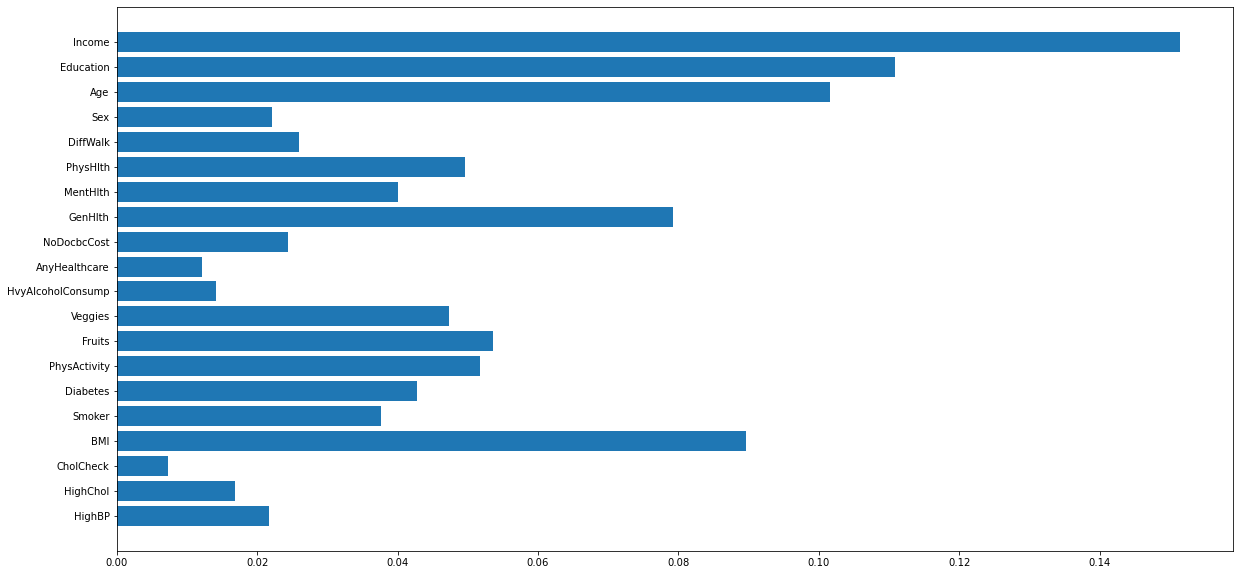

In [27]:
# Feature Importance based on decision tree model

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.barh(X_train2.columns, dt2.feature_importances_)
plt.show()

## Dropping Non-Important Variables and Running Another Decision Tree

Will drop variables: Sex, DiffWalk, NoDocbcCost, AnyHealthCare, HvyAlcoholConsump, CholCheck

Leaving HighChol and HighBP because still interested in these variables

Will re-run decision tree feature importance to see if there was just skew and these variables will have more predictive power after other "noisy" variables are dropped.

In [29]:
df_hd_stroke_clean = df_hd_stroke.drop(columns=["Sex", "DiffWalk", "NoDocbcCost", "AnyHealthcare", "HvyAlcoholConsump", "CholCheck"]).astype('category')

In [30]:
#df_hd_stroke csv will be fused HD+Stroke data
df_hd_stroke_clean.to_csv('df_hd_stroke_clean.csv', index=False)

# Load the data // dtype category specified to load all data as categories

df_hd_stroke_clean = pd.read_csv('df_hd_stroke_clean.csv', dtype='category')
df_hd_stroke_clean.index.name = 'case'

#making sure all columns we want are present
print(df_hd_stroke_clean.dtypes)

HighBP          category
HighChol        category
BMI             category
Smoker          category
Diabetes        category
PhysActivity    category
Fruits          category
Veggies         category
GenHlth         category
MentHlth        category
PhysHlth        category
Age             category
Education       category
Income          category
HD+Stroke       category
dtype: object


In [32]:
# Encode the categorical variables as numeric using LabelEncoder
le3 = LabelEncoder()
for col in df_hd_stroke_clean.columns:
    if df_hd_stroke_clean[col].dtype == 'category':
        df_hd_stroke_clean[col] = le3.fit_transform(df_hd_stroke_clean[col])

# Define the predictor and target variables
X3 = df_hd_stroke_clean.drop(['HD+Stroke'], axis=1)
y3 = df_hd_stroke_clean['HD+Stroke']

# Split the data into training and testing sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Create a decision tree model
dt3 = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dt3.fit(X_train3, y_train3)

# Plot the decision tree
#dont need to plot, not legible and very taxing on computer/ takes long time to run
#plot_tree(dt, feature_names=X.columns, class_names=['0','1'], filled=True)

DecisionTreeClassifier(random_state=42)

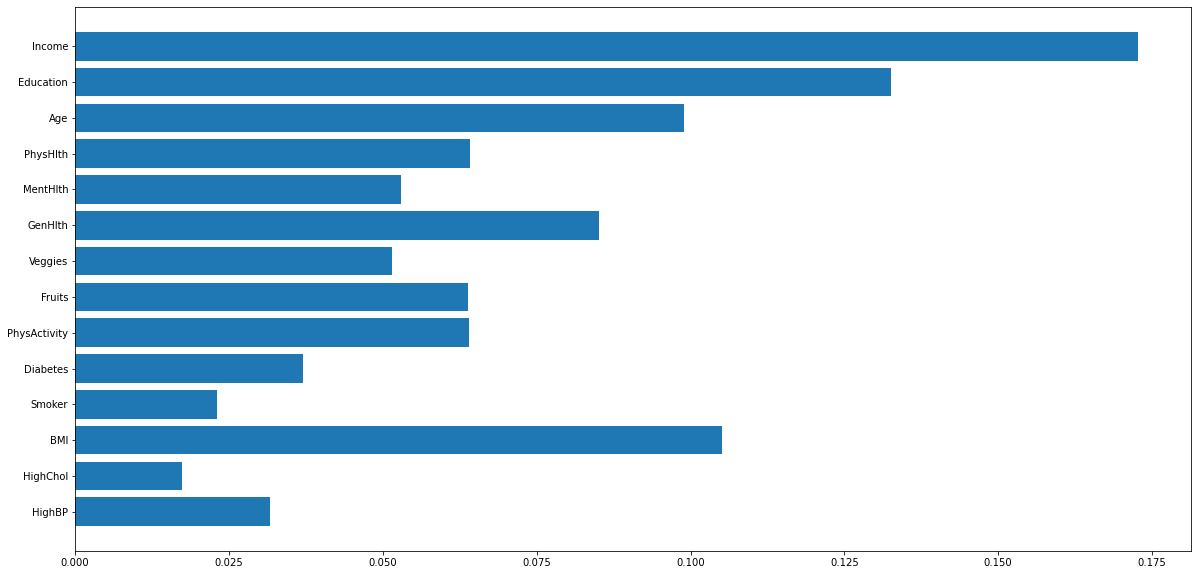

In [33]:
# Feature Importance based on decision tree model

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.barh(X_train3.columns, dt3.feature_importances_)
plt.show()

Findings show HighChol and HighBP are consistent with previous findings, these variables have very low predicitve power. 

HighBP higher than HighChol but still low 

Smoker seems to have lost predictive power as well

## Original Variables

In [34]:
df = df.drop('HD+Stroke', axis=1)

In [35]:
df.to_csv('cleaned.csv', index=False)
#cleaned csv will be all the original columns after binning

# Load the data
df_cleaned = pd.read_csv('cleaned.csv', dtype='category')
df_cleaned.index.name = 'case'

#making sure all variables wanted are present
print(df_cleaned.dtypes)

HeartDiseaseorAttack    category
HighBP                  category
HighChol                category
CholCheck               category
BMI                     category
Smoker                  category
Stroke                  category
Diabetes                category
PhysActivity            category
Fruits                  category
Veggies                 category
HvyAlcoholConsump       category
AnyHealthcare           category
NoDocbcCost             category
GenHlth                 category
MentHlth                category
PhysHlth                category
DiffWalk                category
Sex                     category
Age                     category
Education               category
Income                  category
dtype: object


In [36]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

# Load the data
#df_cleaned = pd.read_csv('your_file_path.csv')

# Encode the categorical variables as numeric using LabelEncoder
le = LabelEncoder()
for col in df_cleaned.columns:
    if df_cleaned[col].dtype == 'category':
        df_cleaned[col] = le.fit_transform(df_cleaned[col])

# Define the predictor and target variables
X = df_cleaned.drop(['HeartDiseaseorAttack'], axis=1)
y = df_cleaned['HeartDiseaseorAttack']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree model
dt = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dt.fit(X_train, y_train)

# Plot the decision tree
#dont need to plot, not legible and very taxing on computer/ takes long time to run
#plot_tree(dt, feature_names=X.columns, class_names=['0','1'], filled=True)


DecisionTreeClassifier(random_state=42)

### Decision Tree Feature Importance for Original Variables

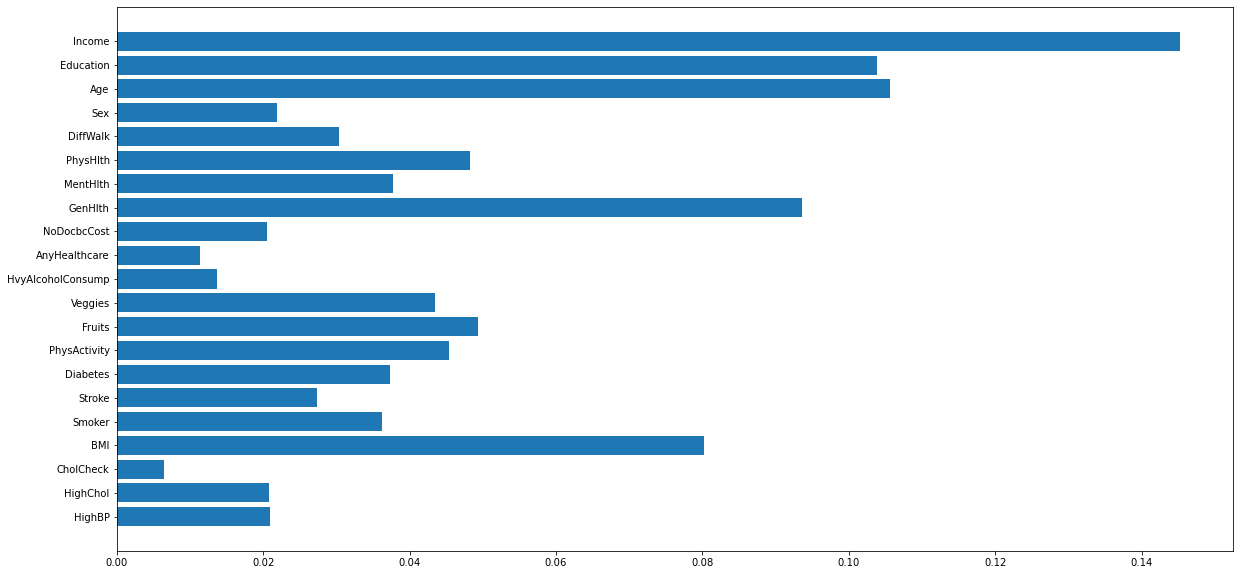

In [37]:
# Feature Importance based on decision tree model

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.barh(X_train.columns, dt.feature_importances_)
plt.show()

## Dropping Non-Important Variables and Running Another Decision Tree

***Similar:***

Will drop variables: Sex, DiffWalk, NoDocbcCost, AnyHealthCare, HvyAlcoholConsump, CholCheck, **& Stroke**

Leaving HighChol and HighBP because still interested in these variables

Will re-run decision tree feature importance to see if there was just skew and these variables will have more predictive power after other "noisy" variables are dropped.

In [44]:
df_clean2 = df_cleaned.drop(columns=["Stroke", "Sex", "DiffWalk", "NoDocbcCost", "AnyHealthcare", "HvyAlcoholConsump", "CholCheck"]).astype('category')

In [45]:
df_clean2.to_csv('df_clean2.csv', index=False)

# Load the data // dtype category specified to load all data as categories

df_clean2 = pd.read_csv('df_clean2.csv', dtype='category')
df_clean2.index.name = 'case'

#making sure all columns we want are present
print(df_clean2.dtypes)

HeartDiseaseorAttack    category
HighBP                  category
HighChol                category
BMI                     category
Smoker                  category
Diabetes                category
PhysActivity            category
Fruits                  category
Veggies                 category
GenHlth                 category
MentHlth                category
PhysHlth                category
Age                     category
Education               category
Income                  category
dtype: object


In [46]:
# Encode the categorical variables as numeric using LabelEncoder
le4 = LabelEncoder()
for col in df_clean2.columns:
    if df_clean2[col].dtype == 'category':
        df_clean2[col] = le4.fit_transform(df_clean2[col])

# Define the predictor and target variables
X4 = df_clean2.drop(['HeartDiseaseorAttack'], axis=1)
y4 = df_clean2['HeartDiseaseorAttack']

# Split the data into training and testing sets
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state=42)

# Create a decision tree model
dt4 = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dt4.fit(X_train4, y_train4)

# Plot the decision tree
#dont need to plot, not legible and very taxing on computer/ takes long time to run
#plot_tree(dt, feature_names=X.columns, class_names=['0','1'], filled=True)

DecisionTreeClassifier(random_state=42)

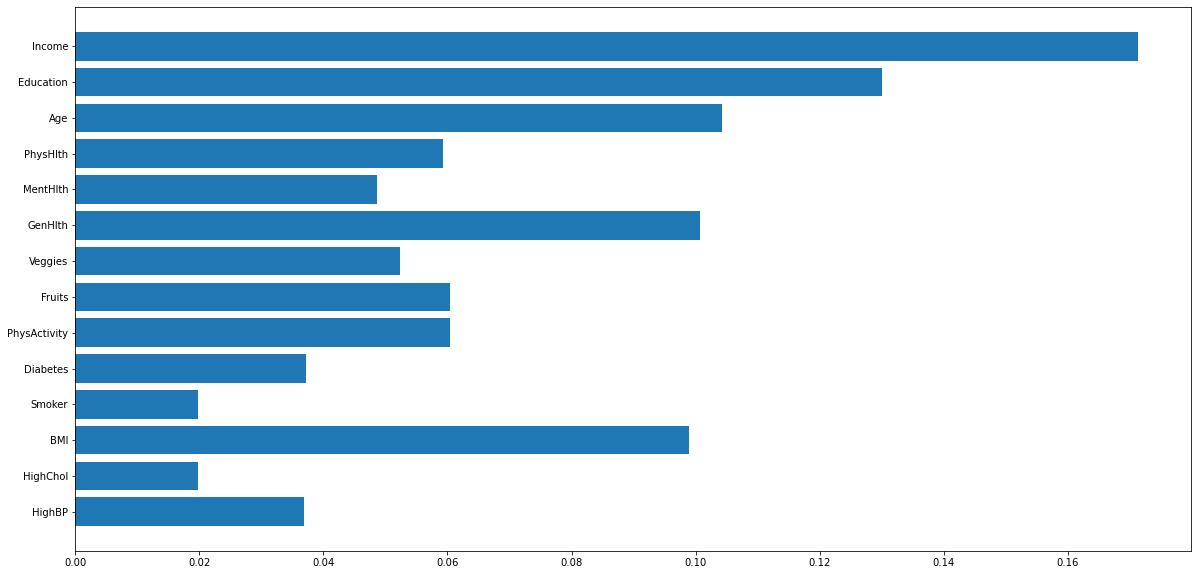

In [47]:
# Feature Importance based on decision tree model

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.barh(X_train4.columns, dt4.feature_importances_)
plt.show()

***Similar findings to fused data:***

HighBP higher than HighChol but still low 

Smoker seems to have lost predictive power as well

## Large Take-Aways from Decision Trees

Findings seem to be consistent with fused and non fused data ie original variables and Fused HD+Stroke

Even after dropping "non-important" variables the findings seem consistent in that Income, Education, Age, GenHlth, and BMI seem to give us most predicitve power in relation to our response variables (HD+Stroke & HeartDiseaseorAttack)